Seleciona todas as informações do banco de dados

In [6]:
import sqlite3

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Executar a consulta para selecionar todos os dados da tabela weather_data
c.execute("SELECT * FROM weather_data")

# Obter todos os resultados da consulta
rows = c.fetchall()

# Exibir os dados recuperados
if rows:
    for row in rows:
        print(f"ID: {row[0]}, Cidade: {row[1]}, Temperatura: {row[2]}°C, Humidade: {row[3]}%, Descrição: {row[4]}, Data/Hora: {row[5]}")
else:
    print("Nenhum dado encontrado na tabela weather_data.")

# Fechar a conexão
conn.close()


ID: 1, Cidade: Batatais, Temperatura: 22.81°C, Humidade: 32%, Descrição: clear sky, Data/Hora: 2024-09-14 22:36:50
ID: 2, Cidade: Batatais, Temperatura: 22.81°C, Humidade: 32%, Descrição: clear sky, Data/Hora: 2024-09-14 22:37:14
ID: 3, Cidade: Ribeirão Preto, Temperatura: 23.73°C, Humidade: 59%, Descrição: few clouds, Data/Hora: 2024-09-16 11:30:32
ID: 4, Cidade: Ribeirão Preto, Temperatura: 24.28°C, Humidade: 51%, Descrição: clear sky, Data/Hora: 2024-09-16 20:33:50
ID: 5, Cidade: Ribeirão Preto, Temperatura: 31.0°C, Humidade: 25%, Descrição: clear sky, Data/Hora: 2024-09-23 19:55:23
ID: 6, Cidade: Ribeirão Preto, Temperatura: 25.5°C, Humidade: 60%, Descrição: clear sky, Data/Hora: 2024-09-23 10:00
ID: 7, Cidade: Ribeirão Preto, Temperatura: 28.0°C, Humidade: 70%, Descrição: clear sky, Data/Hora: 2024-09-23 10:00
ID: 8, Cidade: Ribeirão Preto, Temperatura: 22.3°C, Humidade: 50%, Descrição: clear sky, Data/Hora: 2024-09-23 10:00
ID: 9, Cidade: Ribeirão Preto, Temperatura: 18.0°C, Humi

Análise de Tendência de Temperatura

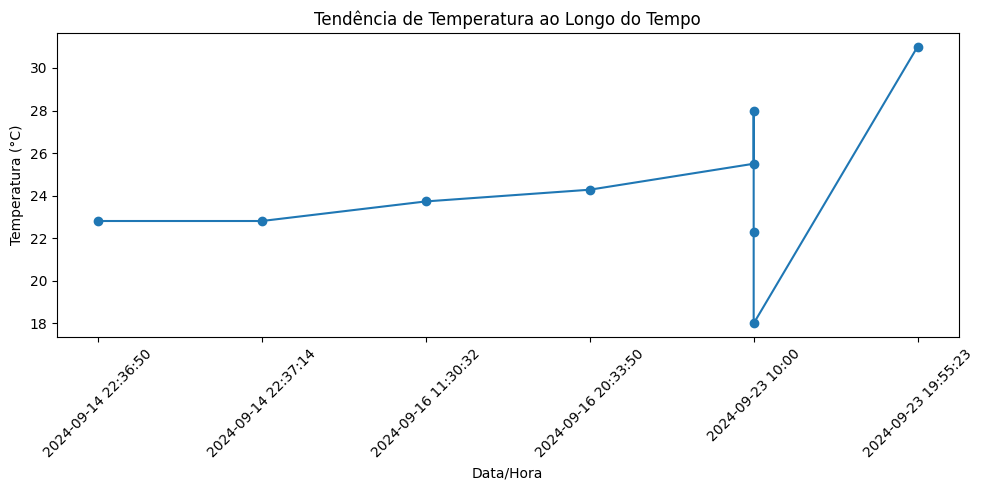

In [7]:
import sqlite3
import matplotlib.pyplot as plt

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de temperatura
c.execute("SELECT datetime, temperature FROM weather_data ORDER BY datetime")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para o gráfico
dates = [row[0] for row in rows]
temperatures = [row[1] for row in rows]

# Plotar gráfico
plt.figure(figsize=(10, 5))
plt.plot(dates, temperatures, marker='o')
plt.xlabel('Data/Hora')
plt.ylabel('Temperatura (°C)')
plt.title('Tendência de Temperatura ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Análise de Umidade

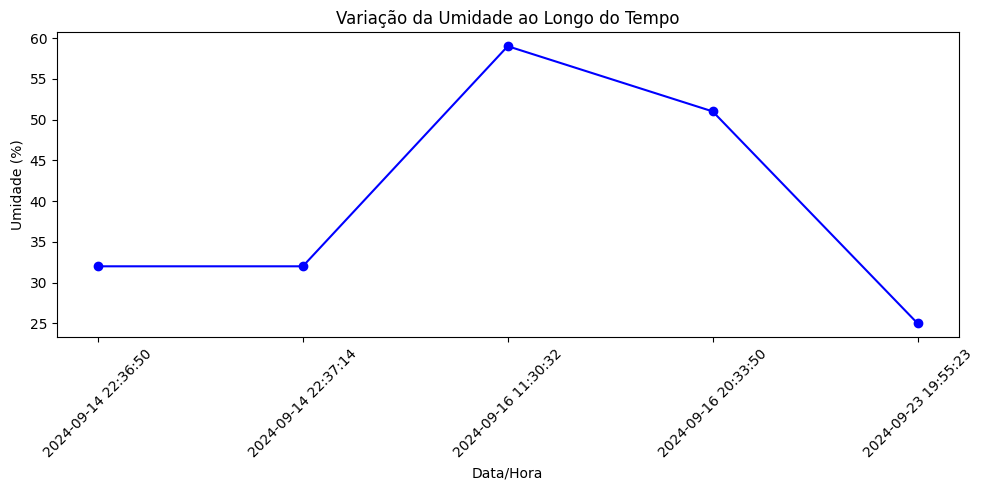

In [3]:
import sqlite3
import matplotlib.pyplot as plt

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de umidade
c.execute("SELECT datetime, humidity FROM weather_data ORDER BY datetime")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para o gráfico
dates = [row[0] for row in rows]
humidities = [row[1] for row in rows]

# Plotar gráfico
plt.figure(figsize=(10, 5))
plt.plot(dates, humidities, marker='o', color='blue')
plt.xlabel('Data/Hora')
plt.ylabel('Umidade (%)')
plt.title('Variação da Umidade ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Análise Estatística

In [4]:
import sqlite3
import numpy as np

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de temperatura e umidade
c.execute("SELECT temperature, humidity FROM weather_data")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para análise
temperatures = [row[0] for row in rows]
humidities = [row[1] for row in rows]

# Calcular estatísticas
temperature_mean = np.mean(temperatures)
temperature_median = np.median(temperatures)
temperature_std = np.std(temperatures)

humidity_mean = np.mean(humidities)
humidity_median = np.median(humidities)
humidity_std = np.std(humidities)

# Exibir estatísticas
print(f"Temperatura - Média: {temperature_mean:.2f}°C, Mediana: {temperature_median:.2f}°C, Desvio Padrão: {temperature_std:.2f}")
print(f"Umidade - Média: {humidity_mean:.2f}%, Mediana: {humidity_median:.2f}%, Desvio Padrão: {humidity_std:.2f}")


Temperatura - Média: 24.93°C, Mediana: 23.73°C, Desvio Padrão: 3.09
Umidade - Média: 39.80%, Mediana: 32.00%, Desvio Padrão: 12.92


INSERÇÃO DE TESTE

In [5]:
import sqlite3

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Inserir dados na tabela weather_data
data = [
    ('Ribeirão Preto', 25.5, 60, 'clear sky', '2024-09-23 10:00'),
    ('Ribeirão Preto', 28.0, 70, 'clear sky', '2024-08-28 10:00'),
    ('Ribeirão Preto', 22.3, 50, 'clear sky', '2024-07-27 10:00'),
    ('Ribeirão Preto', 18.0, 80, 'clear sky', '2024-06-26 10:00'),
]

# Executar inserções
c.executemany('''
    INSERT INTO weather_data (city, temperature, humidity, description, datetime)
    VALUES (?, ?, ?, ?, ?)
''', data)

# Confirmar as alterações
conn.commit()

# Fechar a conexão
conn.close()


Temperatura - Média: 24.27°C, Mediana: 23.73°C, Desvio Padrão: 3.47
Umidade - Média: 51.00%, Mediana: 51.00%, Desvio Padrão: 17.47
Nenhuma imagem disponível para essa faixa de temperatura


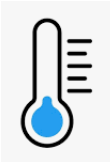

In [38]:
import sqlite3
import numpy as np
from IPython.display import Image, display

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de temperatura e umidade
c.execute("SELECT temperature, humidity FROM weather_data")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para análise
temperatures = [row[0] for row in rows]
humidities = [row[1] for row in rows]

# Calcular estatísticas
temperature_mean = np.mean(temperatures)
temperature_median = np.median(temperatures)
temperature_std = np.std(temperatures)

humidity_mean = np.mean(humidities)
humidity_median = np.median(humidities)
humidity_std = np.std(humidities)

# Exibir estatísticas
print(f"Temperatura - Média: {temperature_mean:.2f}°C, Mediana: {temperature_median:.2f}°C, Desvio Padrão: {temperature_std:.2f}")
print(f"Umidade - Média: {humidity_mean:.2f}%, Mediana: {humidity_median:.2f}%, Desvio Padrão: {humidity_std:.2f}")

# Caminho para a imagem que você deseja exibir
caminho_imagem1 = 'Img/imagem1.jpg'  # imagem1
caminho_imagem2 = 'Img/imagem2.jpg'  # imagem1
caminho_imagem3 = 'Img/imagem3.jpg'  # imagem1

# Exibir imagem com base na média da temperatura
if -40 <= temperature_mean <= 0:
    display(Image(filename=caminho_imagem1))
elif 0 < temperature_mean <= 20:
    display(Image(filename=caminho_imagem2))
elif 30 <= temperature_mean <= 60:
    display(Image(filename=caminho_imagem3))
else:
    print("Nenhuma imagem disponível para essa faixa de temperatura")






# Exibir a imagem
display(Image(filename=caminho_imagem1))
